In [1]:
import pandas as pd
import numpy as np
import re

### ** Đọc dữ liệu **

In [2]:
countries = pd.read_csv('../raw_data_train/country_rankings.csv')
clubs = pd.read_csv('../raw_data_train/club_tournament.csv')
players = pd.read_csv('../raw_data_train/players_data.csv')

### ** Thêm dữ liệu hệ số giải đấu ('point_of_tournament') vào dữ liệu cầu thủ **

In [3]:
players = players.merge(countries[['name', 'points']], how='left', left_on='country', right_on='name')
players = players.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players = players.drop('name_y', axis=1)

### ** Xử lý dữ liệu **

#### 1. Xử lý dữ liệu 'market_value'

In [4]:
players[['name', 'market_value']].head(3)

,name,market_value
0,Luciano Gondou,7.4M €
1,Maximiliano Romero,2.5M €
2,Gastón Verón,1.2M €


In [5]:
all_values = players['market_value']
unique_letters = set()

for value in all_values:
    letters = re.findall('[A-Za-z]', value)
    unique_letters.update(letters)
print(unique_letters)

{'K', 'M'}


In [6]:
players['market_value'] = players['market_value'].str.replace(' €', '')
players['market_value'] = players['market_value'].apply(lambda x: int(float(x[:-1]) * 1 if x[-1] == 'K' else float(x[:-1]) * 1000))

In [7]:
players[['name', 'market_value']].head(3)

,name,market_value
0,Luciano Gondou,7400
1,Maximiliano Romero,2500
2,Gastón Verón,1200


#### 2. Xử lý dữ liệu 'age'

In [8]:
players[['name', 'age']].head(3)

,name,age
0,Luciano Gondou,22 yrs
1,Maximiliano Romero,25 yrs
2,Gastón Verón,22 yrs


In [9]:
players['age'] = players['age'].apply(lambda x: x.split(" ")[0])

In [10]:
players[['name', 'age']].head(3)

,name,age
0,Luciano Gondou,22
1,Maximiliano Romero,25
2,Gastón Verón,22


#### 3. Xử lý dữ liệu 'height'

In [11]:
players[['name', 'height']].head(3)

,name,height
0,Luciano Gondou,189 cm
1,Maximiliano Romero,179 cm
2,Gastón Verón,184 cm


In [12]:
players['height'] = players['height'].apply(lambda x: x.split(" ")[0])

In [13]:
players[['name', 'height']].head(3)

,name,height
0,Luciano Gondou,189
1,Maximiliano Romero,179
2,Gastón Verón,184


### ** Xóa bỏ cột dư thừa **

#### 1. Xóa bỏ cột dư thừa của bảng 'countries'

In [14]:
countries.head(2)

,rank,name,name_code,points,slug,category_id,tournament_name,tournament_slug,tournament_id,tournament_season_id
0,1,Argentina,ARG,1858.00,argentina,48.0,Liga Profesional de Fútbol,liga-profesional-de-futbol,155.0,57478.0
1,2,France,FRA,1840.59,france,7.0,Ligue 1,ligue-1,34.0,52571.0


In [15]:
countries = countries.drop(['slug', 'category_id', 'tournament_slug', 'tournament_id', 'tournament_season_id'], axis=1)

In [16]:
countries.head(2)

,rank,name,name_code,points,tournament_name
0,1,Argentina,ARG,1858.00,Liga Profesional de Fútbol
1,2,France,FRA,1840.59,Ligue 1


#### 2. Xóa bỏ các cột dư thừa của bảng 'clubs'

In [17]:
clubs.head(2)

,country,tournament,name,short_name,name_code,position,slug,id
0,Argentina,Liga Profesional de Fútbol,Argentinos Juniors,Argentinos Jrs.,ARG,1,argentinos-juniors,3216
1,Argentina,Liga Profesional de Fútbol,Atlético Tucumán,Atlético Tucumán,CAT,2,atletico-tucuman,36833


In [18]:
clubs = clubs.drop(['slug', 'id'], axis=1)
clubs = clubs[['name', 'short_name', 'name_code', 'position', 'tournament', 'country']]

In [19]:
clubs.head(2)

,name,short_name,name_code,position,tournament,country
0,Argentinos Juniors,Argentinos Jrs.,ARG,1,Liga Profesional de Fútbol,Argentina
1,Atlético Tucumán,Atlético Tucumán,CAT,2,Liga Profesional de Fútbol,Argentina


#### 3. Xóa bỏ cột dư thừa của bảng 'players'

In [20]:
players.columns

Index(['name', 'market_value', 'club', 'country', 'league', 'nationality',
       'birth_date', 'age', 'height', 'preferred_foot', 'position',
       'shirt_number', 'attacking', 'technical', 'tactical', 'defending',
       'creativity', 'saves', 'anticipation', 'ball_distribution', 'aerial',
       'avg_score_last_12_months', 'appearances_last_12_months',
       'point_of_tournament'],
      dtype='object')

In [21]:
players = players.drop(['birth_date'], axis=1)

In [22]:
players.columns

Index(['name', 'market_value', 'club', 'country', 'league', 'nationality',
       'age', 'height', 'preferred_foot', 'position', 'shirt_number',
       'attacking', 'technical', 'tactical', 'defending', 'creativity',
       'saves', 'anticipation', 'ball_distribution', 'aerial',
       'avg_score_last_12_months', 'appearances_last_12_months',
       'point_of_tournament'],
      dtype='object')

### ** Chuyển đổi kiểu dữ liệu  **

In [23]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        12421 non-null  object 
 1   market_value                12421 non-null  int64  
 2   club                        12421 non-null  object 
 3   country                     12421 non-null  object 
 4   league                      12421 non-null  object 
 5   nationality                 12421 non-null  object 
 6   age                         12421 non-null  object 
 7   height                      12421 non-null  object 
 8   preferred_foot              12421 non-null  object 
 9   position                    12421 non-null  object 
 10  shirt_number                12421 non-null  int64  
 11  attacking                   12421 non-null  int64  
 12  technical                   12421 non-null  int64  
 13  tactical                    124

In [24]:
players[['market_value', 'age', 'height']] = players[['market_value', 'age', 'height']].apply(pd.to_numeric, errors='coerce')
players['market_value'] = players['market_value'].astype(int)

In [25]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        12421 non-null  object 
 1   market_value                12421 non-null  int32  
 2   club                        12421 non-null  object 
 3   country                     12421 non-null  object 
 4   league                      12421 non-null  object 
 5   nationality                 12421 non-null  object 
 6   age                         12421 non-null  int64  
 7   height                      12421 non-null  int64  
 8   preferred_foot              12421 non-null  object 
 9   position                    12421 non-null  object 
 10  shirt_number                12421 non-null  int64  
 11  attacking                   12421 non-null  int64  
 12  technical                   12421 non-null  int64  
 13  tactical                    124

### ** Trực quan dữ liệu sau khi bước đầu tiền xử lý **

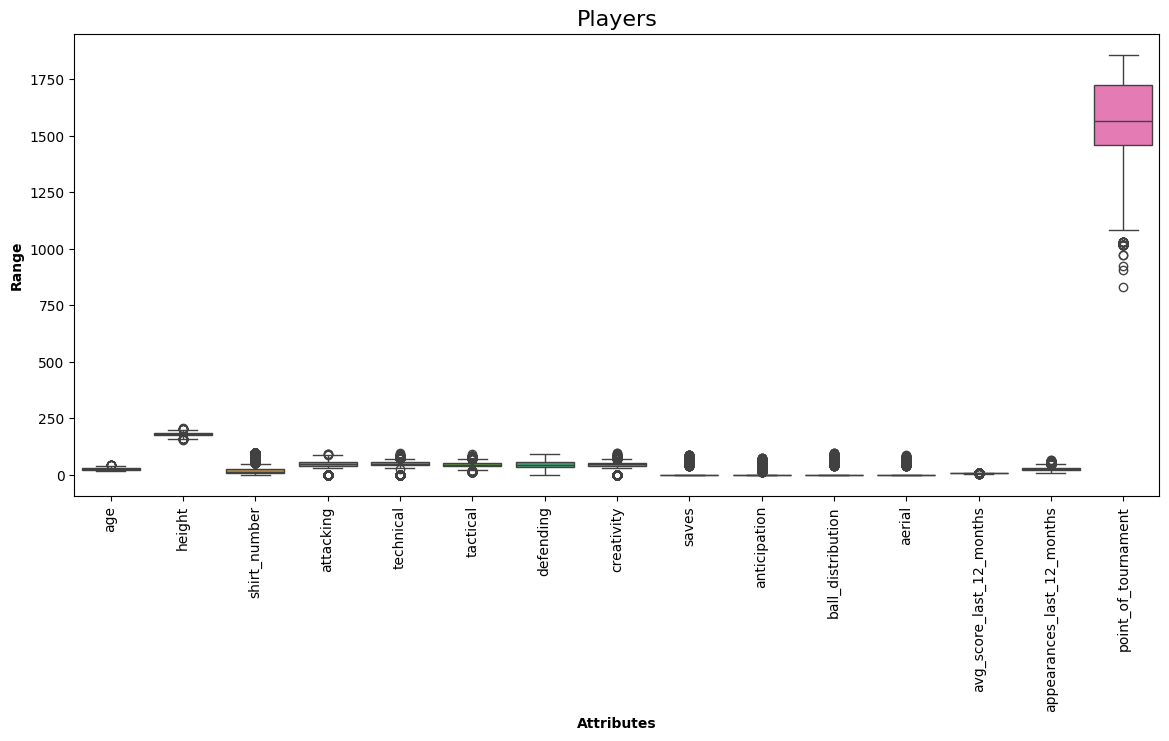

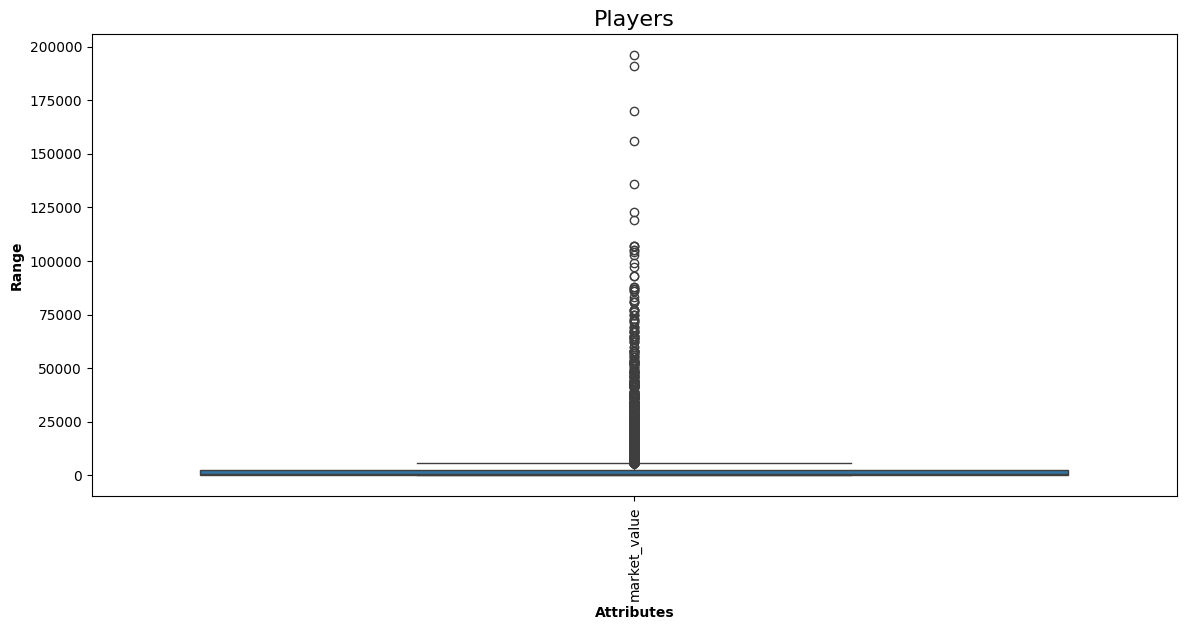

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

players_numerics = players.select_dtypes(include=['float64', 'int64', 'int32'])

def show_boxplot(df, title):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title(title, fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    plt.xticks(rotation=90)
    plt.show()

show_boxplot(players_numerics.drop(['market_value'], axis=1),"Players")
show_boxplot(players_numerics['market_value'].to_frame(),"Players")

### ** Missing data **

In [27]:
players.isna().sum()

name                            0
market_value                    0
club                            0
country                         0
league                          0
nationality                     0
age                             0
height                          0
preferred_foot                  0
position                        0
shirt_number                    0
attacking                       0
technical                       0
tactical                        0
defending                       0
creativity                      0
saves                           0
anticipation                    0
ball_distribution               0
aerial                          0
avg_score_last_12_months        0
appearances_last_12_months      0
point_of_tournament           607
dtype: int64

In [28]:
players[players['point_of_tournament'].isna()]['country'].unique()

array(['England Amateur', 'Switzerland Amateur', 'Czechia', 'Türkiye',
       'Belgium Amateur'], dtype=object)

In [29]:
players = players[~players['point_of_tournament'].isna()]

In [30]:
players[players['point_of_tournament'].isna()].head(3)

,name,market_value,club,country,league,nationality,age,height,preferred_foot,position,...,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament


### ** Loại bỏ các dữ liệu ngoại lệ **

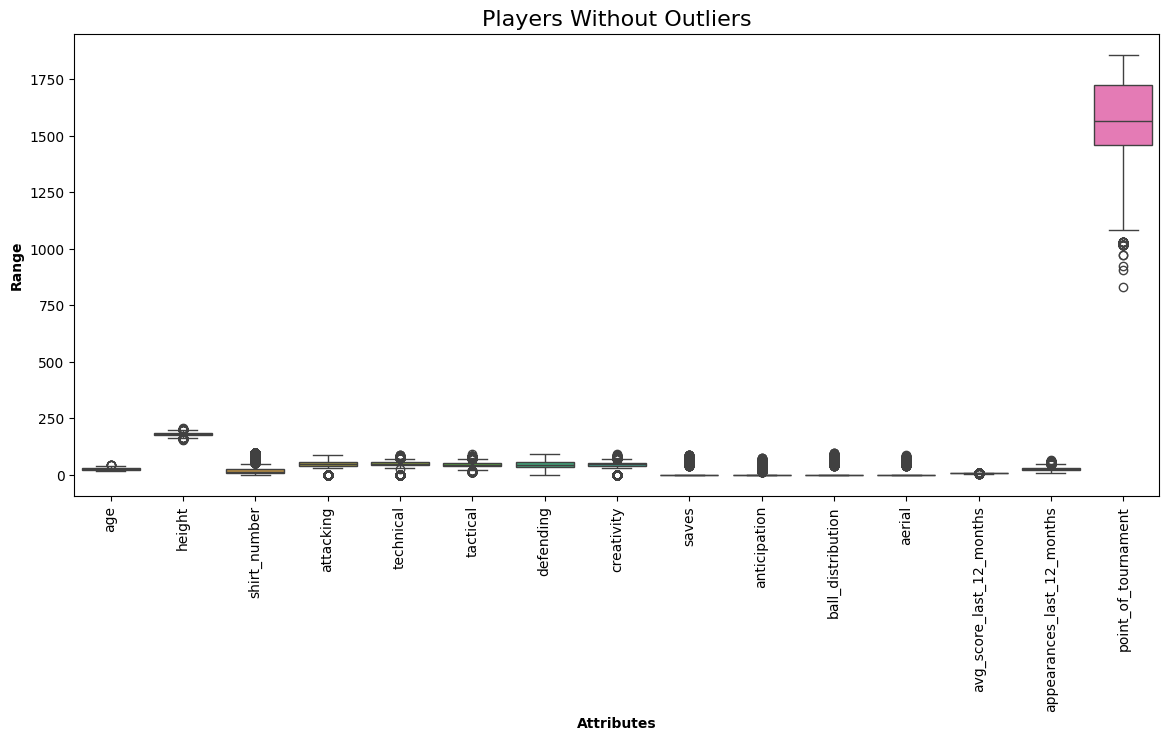

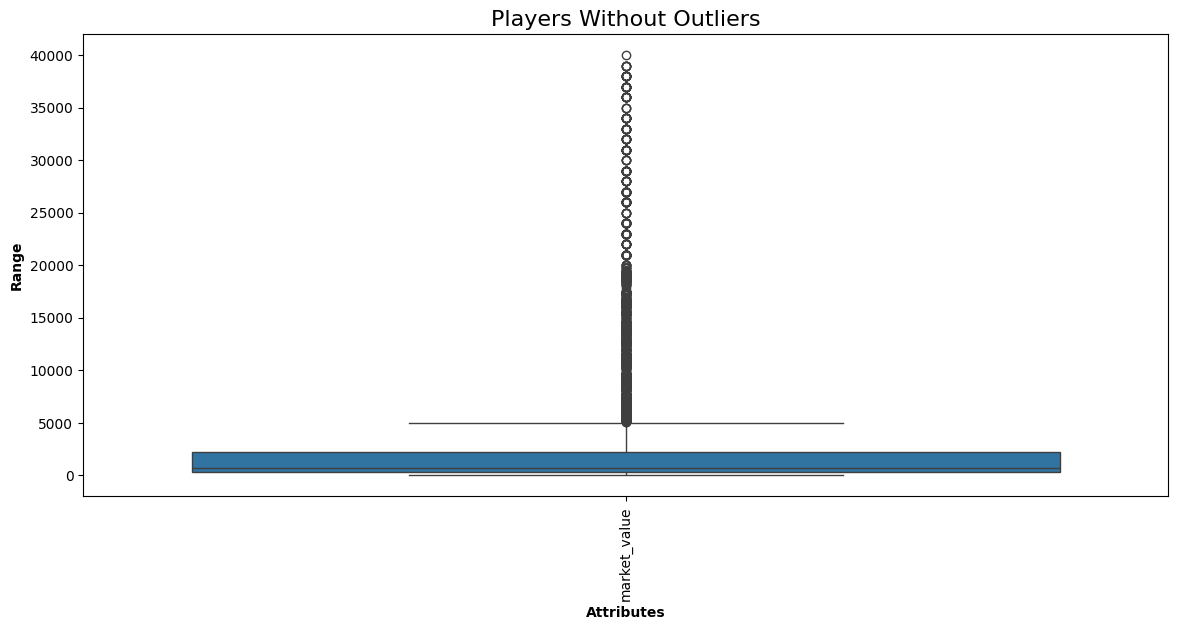

In [31]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        if df[col].dtypes == 'object' or df[col].dtypes == 'datetime64[ns]' or df[col].dtypes == 'bool':
            continue
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

players = remove_outliers(players)
players_numerics = players.select_dtypes(include=['float64', 'int64', 'int32'])

show_boxplot(players_numerics.drop(['market_value'], axis=1),"Players Without Outliers")
show_boxplot(players_numerics['market_value'].to_frame(),"Players Without Outliers")

### ** Ghi lại file data clean **

In [32]:
players = players.drop(['point_of_tournament'], axis=1)
print(players.shape)
print(players_numerics.shape)

players.to_csv('players.csv', index=False)
clubs.to_csv('clubs.csv', index=False)
countries.to_csv('countries.csv', index=False)

(11651, 22)
(11651, 16)
